In [52]:
import sys
from parflow.tools.io import read_pfb,write_pfb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt


# Directory where PF flow PFBs are saved in
#directory_out = '/hydrodata/temp/CONUS2_transfers/CONUS2_spinup_WY2003/averages'#'/glade/scratch/tijerina/CONUS2/spinup_WY2003/averages'
organized_dir = './'#'/glade/p/univ/ucsm0002/CONUS2/Validation/Streamflow/Organized_Daily_Flow'

# Files for average temperature (in C)
data_file = 'Temperature_obs_daily_avg_WY2003.csv' 
metadata_file = 'Temperature_obs_metadata_daily_avg_WY2003.csv'
# need to change water year and number of days
water_year = 2003
no_days = 365 
variable = 'CONUS2_Temp_C'

ny = 3256
nx = 4442

### SNOTEL Avg Daily Temperature 

In [2]:
obs_data = pd.read_csv(data_file, index_col=['site_id'])
obs_data  = obs_data.drop(columns=['Unnamed: 0'])
obs_data = obs_data.loc[(obs_data['num_obs']>340)] # I arbitrarily set this to only include sites with more than 340 days of observations
obs_data

,2002-10-01,2002-10-02,2002-10-03,2002-10-04,2002-10-05,2002-10-06,2002-10-07,2002-10-08,2002-10-09,2002-10-10,...,2003-09-22,2003-09-23,2003-09-24,2003-09-25,2003-09-26,2003-09-27,2003-09-28,2003-09-29,2003-09-30,num_obs
site_id,,,,,,,,,,,,,,,,,,,,,
1000:OR:SNTL,0.6,3.4,4.3,7.2,8.4,8.9,9.2,8.0,6.8,2.8,...,13.1,13.3,13.9,13.5,16.2,16.1,15.0,9.8,8.7,364
1005:CO:SNTL,5.2,3.4,0.6,1.8,5.0,3.5,3.8,3.5,4.9,4.5,...,7.1,9.4,7.5,7.6,9.0,8.7,6.7,8.0,7.6,365
1006:NV:SNTL,0.4,0.6,4.7,4.4,6.4,8.6,9.7,10.0,10.8,12.2,...,15.1,16.3,16.7,16.0,16.6,16.7,17.2,16.5,15.8,363
1008:MT:SNTL,-2.9,-1.0,-0.3,0.6,-0.1,2.5,5.3,2.7,4.8,5.4,...,8.2,7.8,5.7,11.4,7.9,5.9,5.5,2.4,4.2,365
1009:MT:SNTL,-1.2,-0.4,0.6,2.0,1.3,3.1,5.4,3.1,3.7,5.3,...,8.0,8.9,6.3,11.9,8.0,6.0,6.0,3.3,3.9,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985:WA:SNTL,5.6,7.8,7.9,8.7,10.3,13.0,13.6,12.4,12.0,6.8,...,16.7,16.6,17.3,19.8,19.7,19.4,19.7,17.2,16.7,365
988:ID:SNTL,2.1,4.0,6.0,5.2,6.7,8.9,8.2,7.5,7.2,3.5,...,11.7,10.0,10.0,14.5,13.7,11.9,11.6,9.1,8.2,364
989:ID:SNTL,3.9,5.8,5.1,6.8,6.8,9.3,10.7,10.1,9.2,4.1,...,13.3,13.4,14.8,15.6,16.7,17.3,17.7,15.4,18.2,365


In [3]:
metadata = pd.read_csv(metadata_file, index_col=['site_id'])
metadata  = metadata.drop(columns=['Unnamed: 0'])
# also remove the sites with less than 340 obs from the metadata
metadata = metadata[metadata.index.isin(obs_data.index)]
# add number of observations column from the obs_data df
metadata['num_obs'] = obs_data['num_obs']
obs_data = obs_data.drop(columns=['num_obs'])
metadata

,site_type,agency,site_name,site_id_agency,site_query_url,date_metadata_last_updated,latitude,longitude,state,huc,...,file_path,county_name,elevation,shef_id,acton_id,conus1_x,conus1_y,conus2_x,conus2_y,num_obs
site_id,,,,,,,,,,,,,,,,,,,,,
1000:OR:SNTL,SNOTEL station,NRCS,Annie Springs,1000:OR:SNTL,https://wcc.sc.egov.usda.gov/awdbWebService/we...,2023-03-07,42.87007,-122.16518,OR,180102030101,...,/hydrodata/national_obs/point_meteorology/NRCS...,Klamath,6010.0,ANSO3,22G06S,NaN,NaN,258,2286,364
1005:CO:SNTL,SNOTEL station,NRCS,Ute Creek,1005:CO:SNTL,https://wcc.sc.egov.usda.gov/awdbWebService/we...,2023-03-07,37.61480,-105.37322,CO,130100020604,...,/hydrodata/national_obs/point_meteorology/NRCS...,Costilla,10734.0,UTCC2,05M17S,1063.0,495.0,1490,1448,365
1006:NV:SNTL,SNOTEL station,NRCS,Lewis Peak,1006:NV:SNTL,https://wcc.sc.egov.usda.gov/awdbWebService/we...,2023-03-07,40.35720,-116.86470,NV,160401070903,...,/hydrodata/national_obs/point_meteorology/NRCS...,Lander,7370.0,LWPN2,16J01S,137.0,957.0,592,1908,363
1008:MT:SNTL,SNOTEL station,NRCS,Onion Park,1008:MT:SNTL,https://wcc.sc.egov.usda.gov/awdbWebService/we...,2023-03-07,46.91348,-110.85360,MT,100301030801,...,/hydrodata/national_obs/point_meteorology/NRCS...,Meagher,7410.0,ONPM8,10C22S,753.0,1575.0,1196,2499,365
1009:MT:SNTL,SNOTEL station,NRCS,Stringer Creek,1009:MT:SNTL,https://wcc.sc.egov.usda.gov/awdbWebService/we...,2023-03-07,46.92690,-110.90198,MT,100301030801,...,/hydrodata/national_obs/point_meteorology/NRCS...,Meagher,6550.0,STCM8,10C23S,750.0,1577.0,1193,2501,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985:WA:SNTL,SNOTEL station,NRCS,Sourdough Gulch,985:WA:SNTL,https://wcc.sc.egov.usda.gov/awdbWebService/we...,2023-03-07,46.23718,-117.39438,WA,170601030202,...,/hydrodata/national_obs/point_meteorology/NRCS...,Asotin,4000.0,SGUW1,17C06S,245.0,1601.0,709,2531,365
988:ID:SNTL,SNOTEL station,NRCS,Hidden Lake,988:ID:SNTL,https://wcc.sc.egov.usda.gov/awdbWebService/we...,2023-03-07,48.89370,-116.75748,ID,170101040502,...,/hydrodata/national_obs/point_meteorology/NRCS...,Boundary,5040.0,HDLI1,16A12S,361.0,1879.0,825,2796,364
989:ID:SNTL,SNOTEL station,NRCS,Moscow Mountain,989:ID:SNTL,https://wcc.sc.egov.usda.gov/awdbWebService/we...,2023-03-07,46.80500,-116.85350,ID,170603061002,...,/hydrodata/national_obs/point_meteorology/NRCS...,Latah,4700.0,MSCI1,16C02S,300.0,1653.0,763,2580,365


In [4]:
# create a new dataframe to save important things
stats_df = pd.DataFrame(index = obs_data.index,
                      columns= ['site_name','latitude','longitude','year_avg_temp_C'])
stats_df['site_name'] = metadata['site_name']
stats_df['latitude'] = metadata['latitude']
stats_df['longitude'] = metadata['longitude']

In [5]:
stats_df

,site_name,latitude,longitude,year_avg_temp_C
site_id,,,,
1000:OR:SNTL,Annie Springs,42.87007,-122.16518,NaN
1005:CO:SNTL,Ute Creek,37.61480,-105.37322,NaN
1006:NV:SNTL,Lewis Peak,40.35720,-116.86470,NaN
1008:MT:SNTL,Onion Park,46.91348,-110.85360,NaN
1009:MT:SNTL,Stringer Creek,46.92690,-110.90198,NaN
...,...,...,...,...
985:WA:SNTL,Sourdough Gulch,46.23718,-117.39438,NaN
988:ID:SNTL,Hidden Lake,48.89370,-116.75748,NaN
989:ID:SNTL,Moscow Mountain,46.80500,-116.85350,NaN


In [6]:
# calcualate "yearly average" by dividing wtd_sum by num_obs (note not all sites have 365 observations)
# Result for 'yr_avg' is the yearly Average SNOTEL temperature Observations

obs_data_sum = obs_data.sum(axis=1)
print(obs_data_sum)

stats_df['year_avg_temp_C'] = obs_data_sum/metadata['num_obs']
#for y in range(len(obs_data_sum)):
 #   stats_df['year_avg_temp_C'][y] = obs_data_sum[y]/obs_data['num_obs'][y]
# usgs_group_id

site_id
1000:OR:SNTL    1885.4
1005:CO:SNTL     699.2
1006:NV:SNTL    2736.9
1008:MT:SNTL     823.1
1009:MT:SNTL     915.6
                 ...  
985:WA:SNTL     3522.2
988:ID:SNTL     1725.2
989:ID:SNTL     2587.9
990:WA:SNTL     1946.1
991:WA:SNTL     3199.0
Length: 578, dtype: float64


In [7]:
stats_df

,site_name,latitude,longitude,year_avg_temp_C
site_id,,,,
1000:OR:SNTL,Annie Springs,42.87007,-122.16518,5.179670
1005:CO:SNTL,Ute Creek,37.61480,-105.37322,1.915616
1006:NV:SNTL,Lewis Peak,40.35720,-116.86470,7.539669
1008:MT:SNTL,Onion Park,46.91348,-110.85360,2.255068
1009:MT:SNTL,Stringer Creek,46.92690,-110.90198,2.508493
...,...,...,...,...
985:WA:SNTL,Sourdough Gulch,46.23718,-117.39438,9.649863
988:ID:SNTL,Hidden Lake,48.89370,-116.75748,4.739560
989:ID:SNTL,Moscow Mountain,46.80500,-116.85350,7.090137


### CW3E (CONUS2 Forcing)

In [8]:
# daily mean forcing
cw3e_path = '/hydrodata/forcing/processed_data/CONUS2/NLDAS3/daily/WY2003'

In [9]:
# make CONUS2 x and y into arrays for the for loop
conusy = np.asarray(metadata['conus2_y'],dtype = 'int')
conusx = np.asarray(metadata['conus2_x'],dtype = 'int')

In [10]:
# temperature
# Set up arrays 
pf_full_array = np.zeros((no_days, ny, nx))
pf_matched = np.zeros(obs_data.shape)

### READ STREAMFLOW PFBs ###
#Read in CONUS2 daily streamflow PFBs and save as df in flow_df, convert to total accumulated in m^3/h to mean daily in cms
for i in range(no_days):
    step = str(int(i+1)).rjust(3, '0')
    pf_flow_pfb = np.squeeze(read_pfb(f'{cw3e_path}/NLDAS.Temp.daily.min.{step}.pfb'))
    pf_full_array[i,...] = pf_flow_pfb
    print(f'reading {variable} for day {step}')
    for j in range(len(obs_data.index)):
        if conusy[j] < 0:
            pf_matched[j] = 'nan'
            #print('Gage is outside of CONUS2 range')
        else:
            pf_matched[j,i] = pf_full_array[i, conusy[j], conusx[j]]
            #print('Finding value in CONUS2 grid')

reading CONUS2 Temp for day 001
reading CONUS2 Temp for day 002
reading CONUS2 Temp for day 003
reading CONUS2 Temp for day 004
reading CONUS2 Temp for day 005
reading CONUS2 Temp for day 006
reading CONUS2 Temp for day 007
reading CONUS2 Temp for day 008
reading CONUS2 Temp for day 009
reading CONUS2 Temp for day 010
reading CONUS2 Temp for day 011
reading CONUS2 Temp for day 012
reading CONUS2 Temp for day 013
reading CONUS2 Temp for day 014
reading CONUS2 Temp for day 015
reading CONUS2 Temp for day 016
reading CONUS2 Temp for day 017
reading CONUS2 Temp for day 018
reading CONUS2 Temp for day 019
reading CONUS2 Temp for day 020
reading CONUS2 Temp for day 021
reading CONUS2 Temp for day 022
reading CONUS2 Temp for day 023
reading CONUS2 Temp for day 024
reading CONUS2 Temp for day 025
reading CONUS2 Temp for day 026
reading CONUS2 Temp for day 027
reading CONUS2 Temp for day 028
reading CONUS2 Temp for day 029
reading CONUS2 Temp for day 030
reading CONUS2 Temp for day 031
reading 

In [13]:
# Organize PF daily matched array with the same index and dates as the obs_data
pf_match_df = pd.DataFrame(pf_matched)
pf_match_df = pf_match_df.set_index(obs_data.index)
column_headers = list(obs_data.columns.values)
pf_match_df.columns = column_headers

In [16]:
pf_match_df_new = pf_match_df.dropna()
pf_match_df_new = pf_match_df_new-273.15 #convert 
pf_match_df_new

,2002-10-01,2002-10-02,2002-10-03,2002-10-04,2002-10-05,2002-10-06,2002-10-07,2002-10-08,2002-10-09,2002-10-10,...,2003-09-21,2003-09-22,2003-09-23,2003-09-24,2003-09-25,2003-09-26,2003-09-27,2003-09-28,2003-09-29,2003-09-30
site_id,,,,,,,,,,,,,,,,,,,,,
1000:OR:SNTL,-4.690222,-5.478003,1.079431,1.662653,2.426660,4.035760,5.509973,5.455316,4.951593,3.691644,...,5.715479,7.291498,9.548853,9.055261,10.108118,9.325952,12.386469,12.258356,11.065973,5.209314
1005:CO:SNTL,2.039880,2.378900,-0.917822,-6.228125,-4.032721,-1.288794,-1.636786,0.586389,0.361383,-0.282538,...,0.130182,0.272241,0.537561,3.374536,1.335474,2.602533,3.011255,0.681024,-0.591345,2.037256
1006:NV:SNTL,1.985162,-5.710150,-6.734290,1.536523,0.267847,1.051447,3.579584,5.206781,5.201593,5.381586,...,6.712946,7.396631,9.285974,9.835748,10.798120,10.549951,10.745874,11.412714,12.875085,10.591302
1008:MT:SNTL,-3.247778,-7.388281,-4.797095,-3.218848,-0.755621,-3.005530,-0.415472,2.500848,0.319177,1.281213,...,1.151331,-1.433722,3.727777,1.266992,2.905786,8.285089,4.331842,1.325983,3.455164,-4.242651
1009:MT:SNTL,-1.962714,-6.291052,-3.697638,-2.212134,0.421655,-1.638892,0.929224,3.290430,1.401788,2.218713,...,2.141046,-0.296851,4.598169,2.485956,4.317621,9.200739,5.226495,2.309564,4.356592,-3.217963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985:WA:SNTL,1.340814,1.863855,6.149164,5.788232,6.233484,7.415308,8.636804,10.358850,7.807886,9.612115,...,7.779260,8.451654,11.192102,12.158136,13.927789,14.837762,15.583704,14.337091,15.075739,11.681909
988:ID:SNTL,-1.673926,-2.154730,0.438531,2.300226,1.240717,4.013452,5.261957,2.596399,2.100275,4.254938,...,2.276270,3.116144,6.629510,3.027979,4.618127,8.924066,9.069604,8.450403,9.211969,3.074579
989:ID:SNTL,-0.915869,-0.657324,3.667108,1.524957,4.314630,3.486200,5.153436,7.603143,5.307367,5.412225,...,5.190881,4.114954,5.826746,6.284998,9.883630,8.169580,10.425012,9.112695,10.515222,7.586877


In [18]:
obs_data_new = obs_data[obs_data.index.isin(pf_match_df_new.index)]
obs_data_new

,2002-10-01,2002-10-02,2002-10-03,2002-10-04,2002-10-05,2002-10-06,2002-10-07,2002-10-08,2002-10-09,2002-10-10,...,2003-09-21,2003-09-22,2003-09-23,2003-09-24,2003-09-25,2003-09-26,2003-09-27,2003-09-28,2003-09-29,2003-09-30
site_id,,,,,,,,,,,,,,,,,,,,,
1000:OR:SNTL,0.6,3.4,4.3,7.2,8.4,8.9,9.2,8.0,6.8,2.8,...,11.8,13.1,13.3,13.9,13.5,16.2,16.1,15.0,9.8,8.7
1005:CO:SNTL,5.2,3.4,0.6,1.8,5.0,3.5,3.8,3.5,4.9,4.5,...,6.1,7.1,9.4,7.5,7.6,9.0,8.7,6.7,8.0,7.6
1006:NV:SNTL,0.4,0.6,4.7,4.4,6.4,8.6,9.7,10.0,10.8,12.2,...,13.9,15.1,16.3,16.7,16.0,16.6,16.7,17.2,16.5,15.8
1008:MT:SNTL,-2.9,-1.0,-0.3,0.6,-0.1,2.5,5.3,2.7,4.8,5.4,...,2.1,8.2,7.8,5.7,11.4,7.9,5.9,5.5,2.4,4.2
1009:MT:SNTL,-1.2,-0.4,0.6,2.0,1.3,3.1,5.4,3.1,3.7,5.3,...,2.5,8.0,8.9,6.3,11.9,8.0,6.0,6.0,3.3,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985:WA:SNTL,5.6,7.8,7.9,8.7,10.3,13.0,13.6,12.4,12.0,6.8,...,13.4,16.7,16.6,17.3,19.8,19.7,19.4,19.7,17.2,16.7
988:ID:SNTL,2.1,4.0,6.0,5.2,6.7,8.9,8.2,7.5,7.2,3.5,...,8.5,11.7,10.0,10.0,14.5,13.7,11.9,11.6,9.1,8.2
989:ID:SNTL,3.9,5.8,5.1,6.8,6.8,9.3,10.7,10.1,9.2,4.1,...,11.2,13.3,13.4,14.8,15.6,16.7,17.3,17.7,15.4,18.2


In [19]:
metadata_new = metadata[metadata.index.isin(pf_match_df_new.index)]
metadata_new

,site_type,agency,site_name,site_id_agency,site_query_url,date_metadata_last_updated,latitude,longitude,state,huc,...,file_path,county_name,elevation,shef_id,acton_id,conus1_x,conus1_y,conus2_x,conus2_y,num_obs
site_id,,,,,,,,,,,,,,,,,,,,,
1000:OR:SNTL,SNOTEL station,NRCS,Annie Springs,1000:OR:SNTL,https://wcc.sc.egov.usda.gov/awdbWebService/we...,2023-03-07,42.87007,-122.16518,OR,180102030101,...,/hydrodata/national_obs/point_meteorology/NRCS...,Klamath,6010.0,ANSO3,22G06S,NaN,NaN,258,2286,364
1005:CO:SNTL,SNOTEL station,NRCS,Ute Creek,1005:CO:SNTL,https://wcc.sc.egov.usda.gov/awdbWebService/we...,2023-03-07,37.61480,-105.37322,CO,130100020604,...,/hydrodata/national_obs/point_meteorology/NRCS...,Costilla,10734.0,UTCC2,05M17S,1063.0,495.0,1490,1448,365
1006:NV:SNTL,SNOTEL station,NRCS,Lewis Peak,1006:NV:SNTL,https://wcc.sc.egov.usda.gov/awdbWebService/we...,2023-03-07,40.35720,-116.86470,NV,160401070903,...,/hydrodata/national_obs/point_meteorology/NRCS...,Lander,7370.0,LWPN2,16J01S,137.0,957.0,592,1908,363
1008:MT:SNTL,SNOTEL station,NRCS,Onion Park,1008:MT:SNTL,https://wcc.sc.egov.usda.gov/awdbWebService/we...,2023-03-07,46.91348,-110.85360,MT,100301030801,...,/hydrodata/national_obs/point_meteorology/NRCS...,Meagher,7410.0,ONPM8,10C22S,753.0,1575.0,1196,2499,365
1009:MT:SNTL,SNOTEL station,NRCS,Stringer Creek,1009:MT:SNTL,https://wcc.sc.egov.usda.gov/awdbWebService/we...,2023-03-07,46.92690,-110.90198,MT,100301030801,...,/hydrodata/national_obs/point_meteorology/NRCS...,Meagher,6550.0,STCM8,10C23S,750.0,1577.0,1193,2501,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985:WA:SNTL,SNOTEL station,NRCS,Sourdough Gulch,985:WA:SNTL,https://wcc.sc.egov.usda.gov/awdbWebService/we...,2023-03-07,46.23718,-117.39438,WA,170601030202,...,/hydrodata/national_obs/point_meteorology/NRCS...,Asotin,4000.0,SGUW1,17C06S,245.0,1601.0,709,2531,365
988:ID:SNTL,SNOTEL station,NRCS,Hidden Lake,988:ID:SNTL,https://wcc.sc.egov.usda.gov/awdbWebService/we...,2023-03-07,48.89370,-116.75748,ID,170101040502,...,/hydrodata/national_obs/point_meteorology/NRCS...,Boundary,5040.0,HDLI1,16A12S,361.0,1879.0,825,2796,364
989:ID:SNTL,SNOTEL station,NRCS,Moscow Mountain,989:ID:SNTL,https://wcc.sc.egov.usda.gov/awdbWebService/we...,2023-03-07,46.80500,-116.85350,ID,170603061002,...,/hydrodata/national_obs/point_meteorology/NRCS...,Latah,4700.0,MSCI1,16C02S,300.0,1653.0,763,2580,365


In [21]:
# save matched daily average flow and metadata as csv's
pf_match_df_new.to_csv(f'{organized_dir}/PFCONUS2_Daily_matched_{variable}_{water_year}.csv', sep = ",")
obs_data_new.to_csv(f'{organized_dir}/CW3E_Daily_matched_{variable}_{water_year}.csv', sep = ",")
metadata_new.to_csv(f'{organized_dir}/CW3E_metadata_matched_{variable}_{water_year}.csv', sep = ",")

# Compute and save stats

In [24]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
from scipy import stats

import matplotlib.pyplot as plt

In [27]:
water_year = 2003
# Directory containing output csv's from `1_Organize_Streamflow.py`
organized_dir = './'
# Where you want to save plots, etc. to
plot_dir = '/glade/work/tijerina/PFCONUS2-analysis/scripts/Validation/Streamflow/Figures'

# names of csv files
snotel_csv = 'CW3E_Daily_matched_CONUS2_Temp_C_2003.csv'
pf_csv = 'PFCONUS2_Daily_matched_CONUS2_Temp_C_2003.csv'
metadata_csv = 'CW3E_metadata_matched_CONUS2_Temp_C_2003.csv'

In [25]:
### read in CONUS2 daily matched csv
# Temperature in C
pfdata = pd.read_csv(f'{organized_dir}/{pf_csv}',index_col=['site_id'])
print(pfdata.shape)
pfdata.head()

(578, 365)


,2002-10-01,2002-10-02,2002-10-03,2002-10-04,2002-10-05,2002-10-06,2002-10-07,2002-10-08,2002-10-09,2002-10-10,...,2003-09-21,2003-09-22,2003-09-23,2003-09-24,2003-09-25,2003-09-26,2003-09-27,2003-09-28,2003-09-29,2003-09-30
site_id,,,,,,,,,,,,,,,,,,,,,
1000:OR:SNTL,-4.690222,-5.478003,1.079431,1.662653,2.426660,4.035760,5.509973,5.455316,4.951593,3.691644,...,5.715479,7.291498,9.548853,9.055261,10.108118,9.325952,12.386469,12.258356,11.065973,5.209314
1005:CO:SNTL,2.039880,2.378900,-0.917822,-6.228125,-4.032721,-1.288794,-1.636786,0.586389,0.361383,-0.282538,...,0.130182,0.272241,0.537561,3.374536,1.335474,2.602533,3.011255,0.681024,-0.591345,2.037256
1006:NV:SNTL,1.985162,-5.710150,-6.734290,1.536523,0.267847,1.051447,3.579584,5.206781,5.201593,5.381586,...,6.712946,7.396631,9.285974,9.835748,10.798120,10.549951,10.745874,11.412714,12.875085,10.591302
1008:MT:SNTL,-3.247778,-7.388281,-4.797095,-3.218848,-0.755621,-3.005530,-0.415472,2.500848,0.319177,1.281213,...,1.151331,-1.433722,3.727777,1.266992,2.905786,8.285089,4.331842,1.325983,3.455164,-4.242651
1009:MT:SNTL,-1.962714,-6.291052,-3.697638,-2.212134,0.421655,-1.638892,0.929224,3.290430,1.401788,2.218713,...,2.141046,-0.296851,4.598169,2.485956,4.317621,9.200739,5.226495,2.309564,4.356592,-3.217963


In [28]:
### read in USGS daily matched csv
# Temperature in C
snotel_data= pd.read_csv(f'{organized_dir}/{snotel_csv}',index_col=['site_id']) 
print(snotel_data.shape)
snotel_data.head()

(578, 365)


,2002-10-01,2002-10-02,2002-10-03,2002-10-04,2002-10-05,2002-10-06,2002-10-07,2002-10-08,2002-10-09,2002-10-10,...,2003-09-21,2003-09-22,2003-09-23,2003-09-24,2003-09-25,2003-09-26,2003-09-27,2003-09-28,2003-09-29,2003-09-30
site_id,,,,,,,,,,,,,,,,,,,,,
1000:OR:SNTL,0.6,3.4,4.3,7.2,8.4,8.9,9.2,8.0,6.8,2.8,...,11.8,13.1,13.3,13.9,13.5,16.2,16.1,15.0,9.8,8.7
1005:CO:SNTL,5.2,3.4,0.6,1.8,5.0,3.5,3.8,3.5,4.9,4.5,...,6.1,7.1,9.4,7.5,7.6,9.0,8.7,6.7,8.0,7.6
1006:NV:SNTL,0.4,0.6,4.7,4.4,6.4,8.6,9.7,10.0,10.8,12.2,...,13.9,15.1,16.3,16.7,16.0,16.6,16.7,17.2,16.5,15.8
1008:MT:SNTL,-2.9,-1.0,-0.3,0.6,-0.1,2.5,5.3,2.7,4.8,5.4,...,2.1,8.2,7.8,5.7,11.4,7.9,5.9,5.5,2.4,4.2
1009:MT:SNTL,-1.2,-0.4,0.6,2.0,1.3,3.1,5.4,3.1,3.7,5.3,...,2.5,8.0,8.9,6.3,11.9,8.0,6.0,6.0,3.3,3.9


In [29]:
### read in SNOTEL Temperature metadata for all stations 
snotel_metadata = pd.read_csv(f'{organized_dir}/{metadata_csv}',index_col=['site_id'])
print(snotel_metadata.shape)
snotel_metadata.head()

(578, 33)


,site_type,agency,site_name,site_id_agency,site_query_url,date_metadata_last_updated,latitude,longitude,state,huc,...,file_path,county_name,elevation,shef_id,acton_id,conus1_x,conus1_y,conus2_x,conus2_y,num_obs
site_id,,,,,,,,,,,,,,,,,,,,,
1000:OR:SNTL,SNOTEL station,NRCS,Annie Springs,1000:OR:SNTL,https://wcc.sc.egov.usda.gov/awdbWebService/we...,2023-03-07,42.87007,-122.16518,OR,180102030101,...,/hydrodata/national_obs/point_meteorology/NRCS...,Klamath,6010.0,ANSO3,22G06S,NaN,NaN,258,2286,364
1005:CO:SNTL,SNOTEL station,NRCS,Ute Creek,1005:CO:SNTL,https://wcc.sc.egov.usda.gov/awdbWebService/we...,2023-03-07,37.61480,-105.37322,CO,130100020604,...,/hydrodata/national_obs/point_meteorology/NRCS...,Costilla,10734.0,UTCC2,05M17S,1063.0,495.0,1490,1448,365
1006:NV:SNTL,SNOTEL station,NRCS,Lewis Peak,1006:NV:SNTL,https://wcc.sc.egov.usda.gov/awdbWebService/we...,2023-03-07,40.35720,-116.86470,NV,160401070903,...,/hydrodata/national_obs/point_meteorology/NRCS...,Lander,7370.0,LWPN2,16J01S,137.0,957.0,592,1908,363
1008:MT:SNTL,SNOTEL station,NRCS,Onion Park,1008:MT:SNTL,https://wcc.sc.egov.usda.gov/awdbWebService/we...,2023-03-07,46.91348,-110.85360,MT,100301030801,...,/hydrodata/national_obs/point_meteorology/NRCS...,Meagher,7410.0,ONPM8,10C22S,753.0,1575.0,1196,2499,365
1009:MT:SNTL,SNOTEL station,NRCS,Stringer Creek,1009:MT:SNTL,https://wcc.sc.egov.usda.gov/awdbWebService/we...,2023-03-07,46.92690,-110.90198,MT,100301030801,...,/hydrodata/national_obs/point_meteorology/NRCS...,Meagher,6550.0,STCM8,10C23S,750.0,1577.0,1193,2501,365


In [31]:
# set up DF for daily stats, index is station site_id
stats_df = pd.DataFrame(index = snotel_metadata.index, columns = ['latitude', 'longitude', 'conus2_x','conus2_y']) 
#, 'bias', 'pbias','absrelbias', 'relbias','srho', 'r2', 'mse', 'rmse', 'nse',scaled RMSE

stats_df['latitude'] = snotel_metadata['latitude']
stats_df['longitude'] = snotel_metadata['longitude']
stats_df['conus2_x'] = snotel_metadata['conus2_x'].astype(int)
stats_df['conus2_y'] = snotel_metadata['conus2_y'].astype(int)
print(stats_df.shape)
stats_df.head()

(578, 4)


,latitude,longitude,conus2_x,conus2_y
site_id,,,,
1000:OR:SNTL,42.87007,-122.16518,258,2286
1005:CO:SNTL,37.61480,-105.37322,1490,1448
1006:NV:SNTL,40.35720,-116.86470,592,1908
1008:MT:SNTL,46.91348,-110.85360,1196,2499
1009:MT:SNTL,46.92690,-110.90198,1193,2501


In [32]:
# compute annual average for observations
snotel_Temp_sum = snotel_data.sum(axis=1)
stats_df['SNOTE_mean_T_C'] = snotel_Temp_sum/snotel_metadata.num_obs
stats_df['PF_mean_T_C'] = np.mean(pfdata, axis = 1)

In [33]:
# Set up array for stats
r2_daily = np.zeros(len(pfdata.index))
srho_daily = np.zeros(len(pfdata.index))
pval_daily = np.zeros(len(pfdata.index))
mse_daily = np.zeros(len(pfdata.index))
rmse_daily = np.zeros(len(pfdata.index))
nse_daily = np.zeros(len(pfdata.index))
bias_daily = np.zeros(len(pfdata.index))
pbias_daily = np.zeros(len(pfdata.index))
pbias_test = np.zeros(len(pfdata.index))
absrelbias_daily = np.zeros(len(pfdata.index))
relbias_daily = np.zeros(len(pfdata.index))
r2_daily.shape

(578,)

In [36]:
for g in range(len(pfdata.index)):
    gage = pfdata.index[g]
    absrelbias_daily[g] = (abs(pfdata.loc[gage].sum()-snotel_data.loc[gage].sum())/snotel_data.loc[gage].sum()) #absolute relative bias
    bias_daily[g] = (pfdata.loc[gage].sum()-snotel_data.loc[gage].sum())/snotel_data.loc[gage].sum()
    pbias_daily[g] = bias_daily[g]*100
    srho_daily[g], pval_daily[g] = stats.spearmanr(snotel_data.loc[gage], pfdata.loc[gage])
    # mse_daily[g] = mean_squared_error(usgs_flow_matched.loc[gage], pf_flow_matched.loc[gage])
    #rmse_daily[g] = sqrt(mean_squared_error(snotel_data.loc[gage], pfdata.loc[gage]))
    #r2_daily[g] = r2_score(snotel_data.loc[gage], pfdata.loc[gage])

In [37]:
# assign arrays to pandas columns in stats_df
stats_df['absrelbias'] = absrelbias_daily
stats_df['bias'] = bias_daily
stats_df['pbias'] = pbias_daily
stats_df['srho'] = srho_daily
# stats_df['r2'] = r2_daily
# stats_df['rmse'] = rmse_daily

# stats_df['mse'] = mse_daily

In [38]:
stats_df.head()

,latitude,longitude,conus2_x,conus2_y,SNOTE_mean_T_C,PF_mean_T_C,absrelbias,bias,pbias,srho
site_id,,,,,,,,,,
1000:OR:SNTL,42.87007,-122.16518,258,2286,5.179670,1.168682,0.773751,-0.773751,-77.375144,NaN
1005:CO:SNTL,37.61480,-105.37322,1490,1448,1.915616,-2.409297,2.257714,-2.257714,-225.771350,0.905504
1006:NV:SNTL,40.35720,-116.86470,592,1908,7.539669,2.327914,0.689543,-0.689543,-68.954338,NaN
1008:MT:SNTL,46.91348,-110.85360,1196,2499,2.255068,-1.528296,1.677716,-1.677716,-167.771601,0.915223
1009:MT:SNTL,46.92690,-110.90198,1193,2501,2.508493,-0.603107,1.240426,-1.240426,-124.042595,0.923078


In [44]:
stats_df.to_csv('Summary_Stations_SNOTEL_Temp_CONUS2_WY2003.csv')

### Plotting summary plots

In [ ]:
x_length = range(len(stats_df.index))
x_length

Text(0.5, 1.0, 'PF-CONUS2 absolute relative bias')

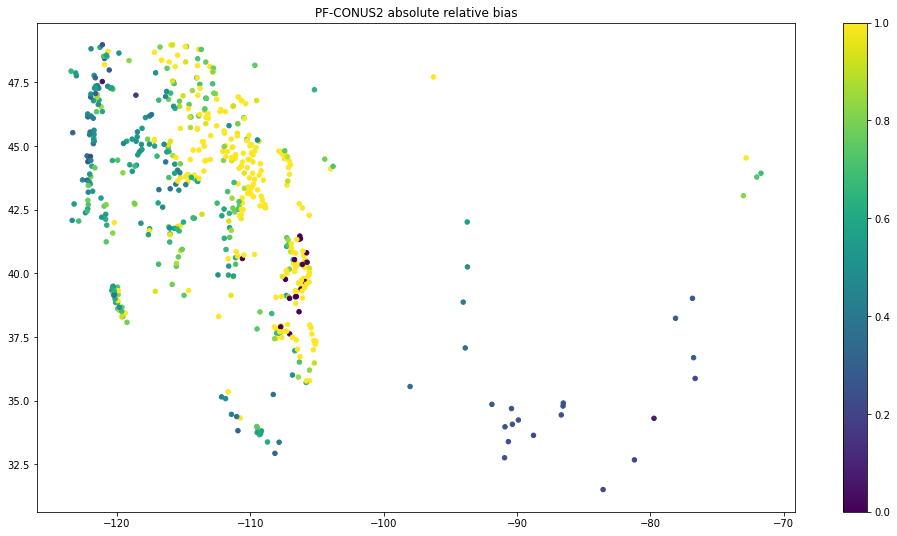

In [39]:
### Absolute Relative Bias
### Good values are closer to 0.0
fig = plt.figure(figsize=(17,9), dpi=72)
plt.scatter(stats_df.longitude,stats_df.latitude, c=stats_df.absrelbias, s=20, vmin = 0, vmax = 1)
plt.colorbar()
plt.title('PF-CONUS2 absolute relative bias')

Text(0.5, 1.0, 'PF-CONUS2 bias')

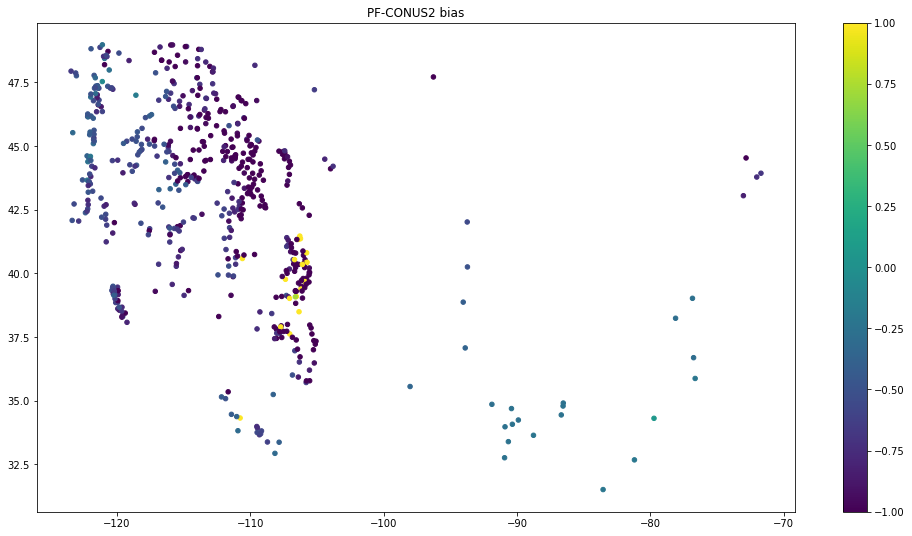

In [40]:
### Relative Bias
### Good values are closer to 0.0, positive is PF overestimation, negative is PF underestimation
fig = plt.figure(figsize=(17,9), dpi=72)
plt.scatter(stats_df.longitude,stats_df.latitude, c=stats_df.bias, s=20, vmin = -1, vmax = 1)
plt.colorbar()
plt.title('PF-CONUS2 bias')

Text(0.5, 1.0, 'PF-CONUS2 srho')

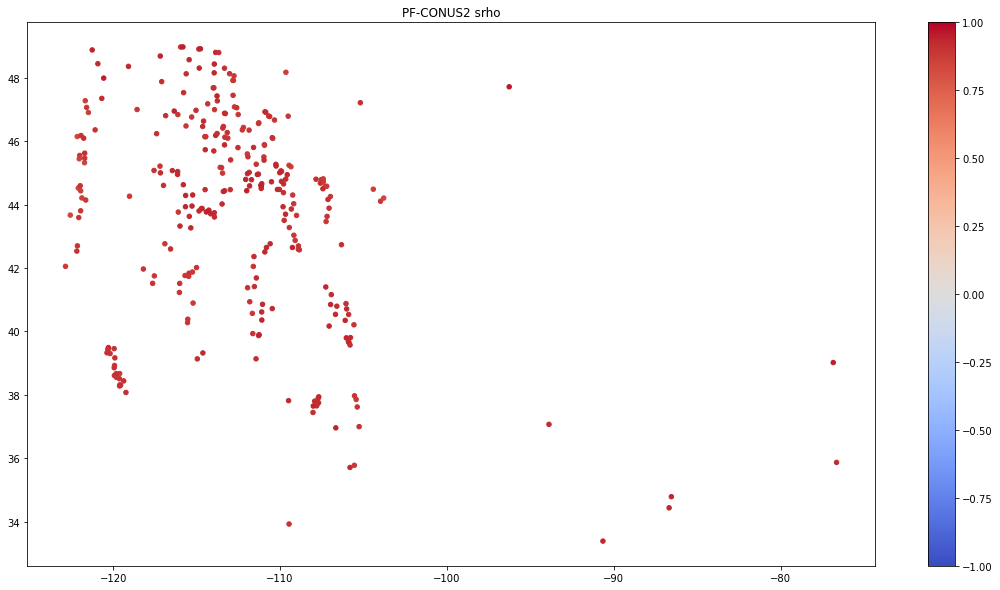

In [41]:
fig = plt.figure(figsize=(19,10), dpi=72)
plt.scatter(stats_df.longitude,stats_df.latitude, c=stats_df.srho, s=20, vmin = -1, vmax = 1, cmap = 'coolwarm')
plt.colorbar()
plt.title('PF-CONUS2 srho')

# Save Timeseries for each station

In [61]:
# Where you want to save plots, etc. to
#plot_dir = '/glade/work/tijerina/PFCONUS2-analysis/scripts/Validation/Streamflow/Figures'
plot_dir = '/home/dtt2/CONUS2/PFCONUS2-analysis/scripts/Validation/SNOTEL/precip_temp/Figures'
stats_csv = 'Summary_Stations_SNOTEL_Temp_CONUS2_WY2003.csv'

In [49]:
### read in USGS daily flow matched csv
stats_df = pd.read_csv(f'{stats_csv}',index_col=['site_id']) 
stats_df.head()

,latitude,longitude,conus2_x,conus2_y,SNOTE_mean_T_C,PF_mean_T_C,absrelbias,bias,pbias,srho
site_id,,,,,,,,,,
1000:OR:SNTL,42.87007,-122.16518,258,2286,5.179670,1.168682,0.773751,-0.773751,-77.375144,NaN
1005:CO:SNTL,37.61480,-105.37322,1490,1448,1.915616,-2.409297,2.257714,-2.257714,-225.771350,0.905504
1006:NV:SNTL,40.35720,-116.86470,592,1908,7.539669,2.327914,0.689543,-0.689543,-68.954338,NaN
1008:MT:SNTL,46.91348,-110.85360,1196,2499,2.255068,-1.528296,1.677716,-1.677716,-167.771601,0.915223
1009:MT:SNTL,46.92690,-110.90198,1193,2501,2.508493,-0.603107,1.240426,-1.240426,-124.042595,0.923078


## Make SNOTEL-CONUS2 timeseries plots 
Plot a timeseries at each station for SNOTEL Temperature observations and PF-CONUS2

In [ ]:
len(snotel_data.columns)

In [63]:
### Make a plot of CONUS2 vs observed
xlength = range(len(snotel_data.columns))
xlength = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in pfdata.columns]

for i in range(len(pfdata.index)):
    gage = snotel_data.index[i]
    station_name = snotel_metadata['site_name'][gage]
    state = snotel_metadata['state'][gage]

    # make hydrographs
    fig, ax = plt.subplots(figsize=(7,5), dpi = 200)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    #plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    ax.plot(xlength, pfdata.loc[gage],label= 'CONUS2 temp')
    ax.plot(xlength, snotel_data.loc[gage],label= 'SNOTEL temp')
    #plt.gcf().autofmt_xdate()
    ax.set_ylabel('temp [C]')
    #plt.xlabel('Days')
    plt.title(f'Mean Daily Temperature - {station_name}, {state}')
    plt.annotate(f'Bias: {round(stats_df.bias.iloc[i],3)}\nSrho: {round(stats_df.srho.iloc[i],3)}',xy=(0.8,0.05), xycoords = 'axes fraction')
    ax.legend()
    plt.savefig(f'{plot_dir}/Timeseries_2003_Temp_SNOTEL/Timeseries_{snotel_data.index[i]}_cms.png',facecolor='white', transparent=False, bbox_inches="tight")
    plt.close()